In [1]:
did = False
if not did:
    %cd ..
    did = True

/Users/adsurbum/projects/univer/EffectiveNPI/src


In [25]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [27]:
import os,fnmatch

def calc_stats(countries,dir_name):
    dic_arr = []
    loglik_arr = []
    lnprobs = []
    for country_name in countries:
        load_data(dir_name+country_name+'.npz',country_name)
        dic_arr.append(calc_DIC())
        loglik_arr.append(calc_LoglikMAP())
        lnprobs.append(lnprobability.mean())
    return dic_arr,loglik_arr,lnprobs

def plot_diff(countries,arr1,arr2,label):
    dic_diff = np.array(round_list(np.array(arr1)-np.array(arr2)))
    countries = np.array(countries)
    s = dic_diff.argsort()
    dic_diff = dic_diff[s]
    countries = countries[s]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(dic_diff,countries,'ok');
    ax.plot(dic_diff[dic_diff>=6],countries[dic_diff>=6],'ok',color='red');
    ax.plot(dic_diff[dic_diff<=-6],countries[dic_diff<=-6],'ok',color='blue');
    ax.hlines(countries[dic_diff<0],dic_diff[dic_diff<0],0,color='blue')
    ax.hlines(countries[dic_diff>=0],dic_diff[dic_diff>=0],0,color='red')
    ax.set(
        xlabel=label,
    )
    plt.axvline(0, ls='--', color='k')
    sns.despine()
    plt.tight_layout()
    print(list(zip(countries,dic_diff)))

In [28]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
countries = [a[:-4] for a in fnmatch.filter(os.listdir(dir_name), '*.npz')]

In [29]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
uni = calc_stats(countries,dir_name)

CPU times: user 14.5 s, sys: 3.97 s, total: 18.5 s
Wall time: 22.4 s


In [30]:
norm = calc_stats(countries,dir_name)

In [31]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
norm = calc_stats(countries,dir_name)

CPU times: user 14.8 s, sys: 4.07 s, total: 18.9 s
Wall time: 22.8 s


In [32]:
def round_list(lst):
    return [round(v,1) for v in lst]

[('Sweden', 30.0, 31.6),
 ('Belgium', 31.9, 31.6),
 ('United_Kingdom', 39.6, 72.3),
 ('Switzerland', 80.0, 88.3),
 ('Wuhan', 77.9, 74.8),
 ('Germany', 210.8, 208.1),
 ('Austria', 32.9, 33.3),
 ('Spain', 81.3, 109.7),
 ('France', 53.8, 51.0),
 ('Italy', 254.1, 270.5),
 ('Denmark', 46.1, 40.9),
 ('Norway', 38.3, 46.5)]

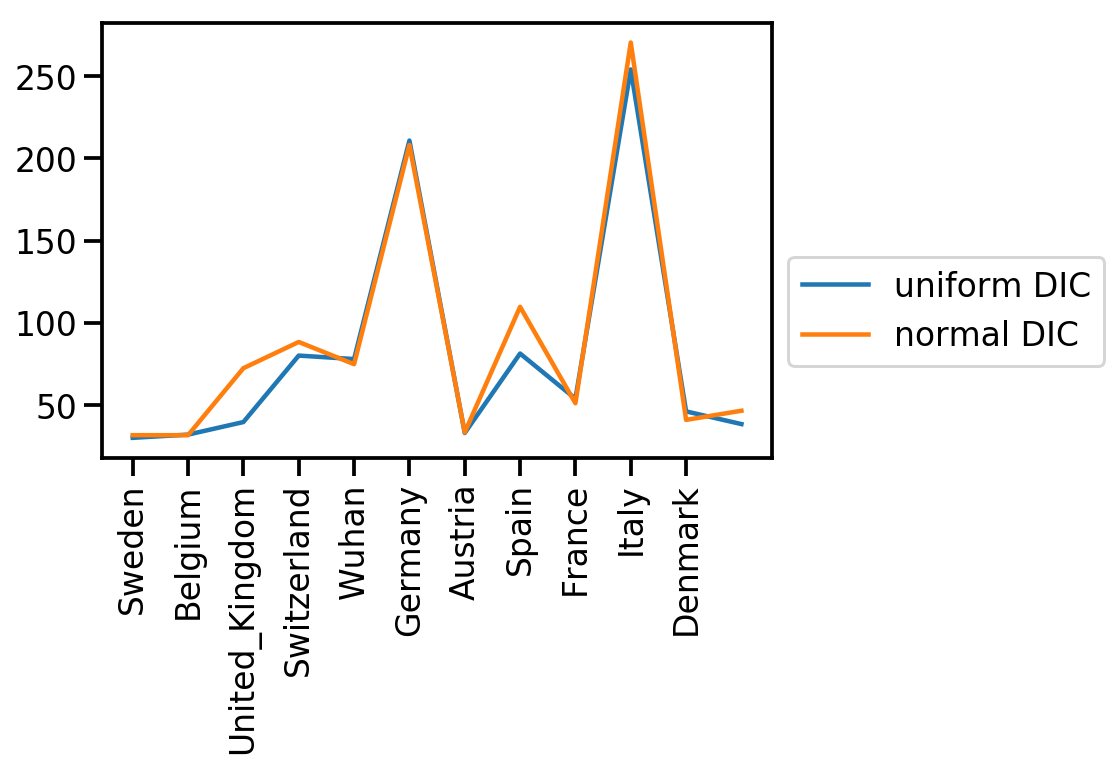

In [33]:
import matplotlib.pyplot as plt
plt.plot(uni[0],label='uniform DIC')
plt.plot(norm[0],label='normal DIC')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
list(zip(countries,round_list(uni[0]),round_list(norm[0])))

[('Sweden', -7.0, -7.2),
 ('Belgium', -11.0, -11.6),
 ('United_Kingdom', -13.4, -13.1),
 ('Switzerland', -29.7, -29.9),
 ('Wuhan', -31.1, -31.4),
 ('Germany', -75.3, -75.3),
 ('Austria', -9.6, -9.8),
 ('Spain', -26.2, -26.2),
 ('France', -20.4, -20.8),
 ('Italy', -111.5, -111.6),
 ('Denmark', -12.1, -13.4),
 ('Norway', -12.0, -11.9)]

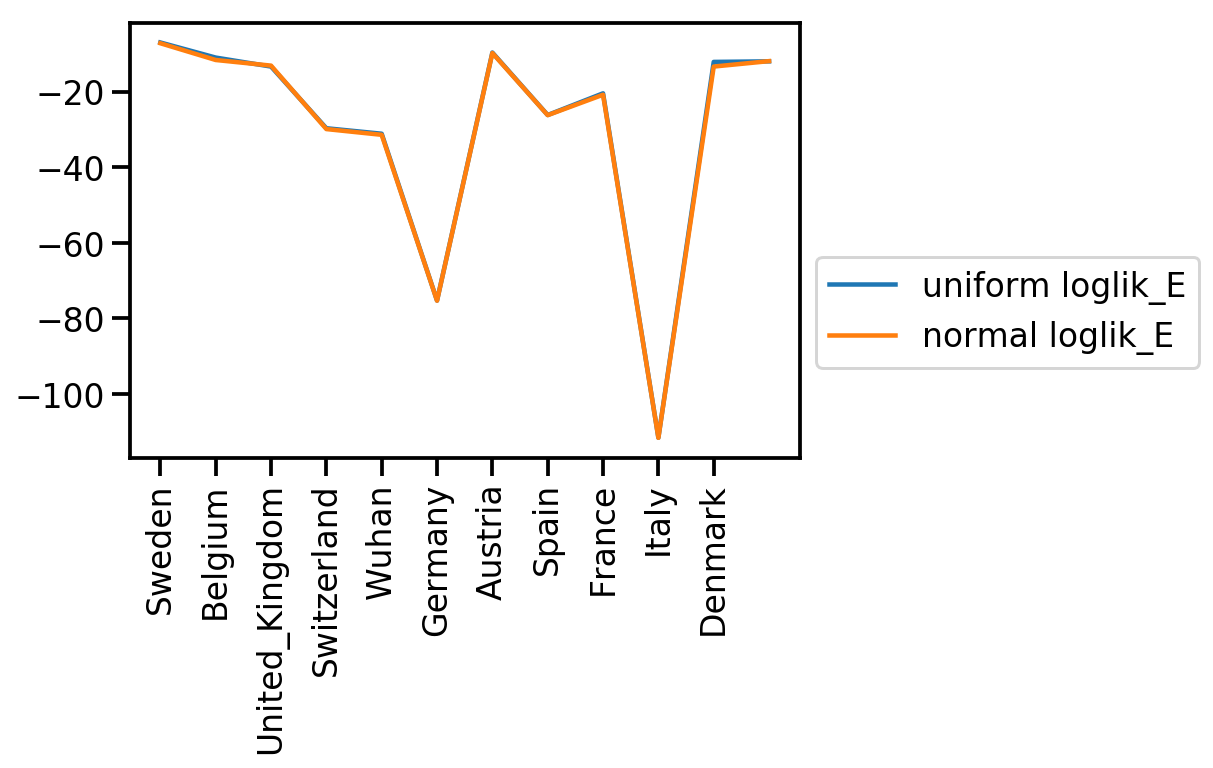

In [34]:
import matplotlib.pyplot as plt
plt.plot(uni[1],label='uniform loglik_E')
plt.plot(norm[1],label='normal loglik_E')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
list(zip(countries,[round(v,1) for v in uni[1]],[round(v,1) for v in norm[1]]))

[('Sweden', -14.4, -15.1),
 ('Belgium', -16.8, -17.0),
 ('United_Kingdom', -20.0, -27.6),
 ('Switzerland', -38.3, -39.9),
 ('Wuhan', -38.2, -39.0),
 ('Germany', -93.8, -92.4),
 ('Austria', -16.5, -16.4),
 ('Spain', -36.9, -43.7),
 ('France', -27.1, -26.8),
 ('Italy', -122.9, -126.8),
 ('Denmark', -21.0, -21.2),
 ('Norway', -19.0, -20.5)]

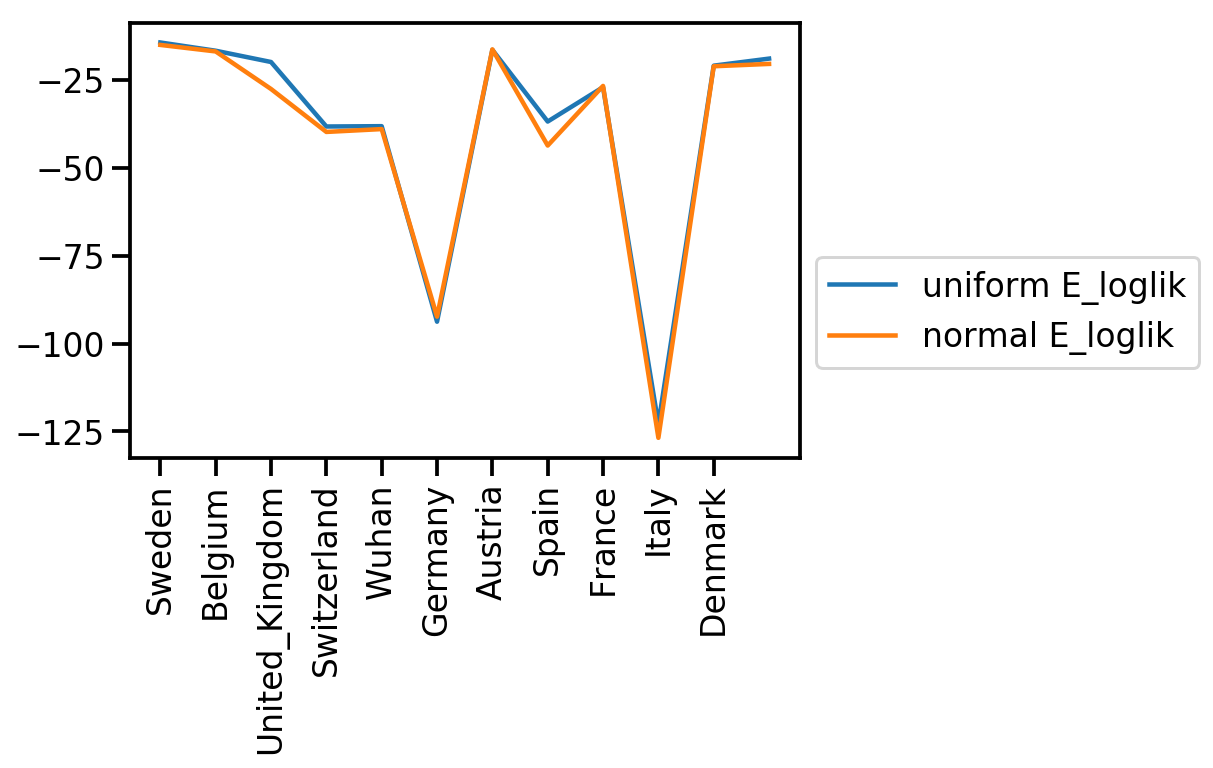

In [35]:
import matplotlib.pyplot as plt
plt.plot(uni[2],label='uniform E_loglik')
plt.plot(norm[2],label='normal E_loglik')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
list(zip(countries,[round(v,1) for v in uni[2]],[round(v,1) for v in norm[2]]))

[('Denmark', -5.2), ('Wuhan', -3.1), ('France', -2.8), ('Germany', -2.7), ('Belgium', -0.4), ('Austria', 0.4), ('Sweden', 1.6), ('Norway', 8.1), ('Switzerland', 8.3), ('Italy', 16.4), ('Spain', 28.4), ('United_Kingdom', 32.8)]


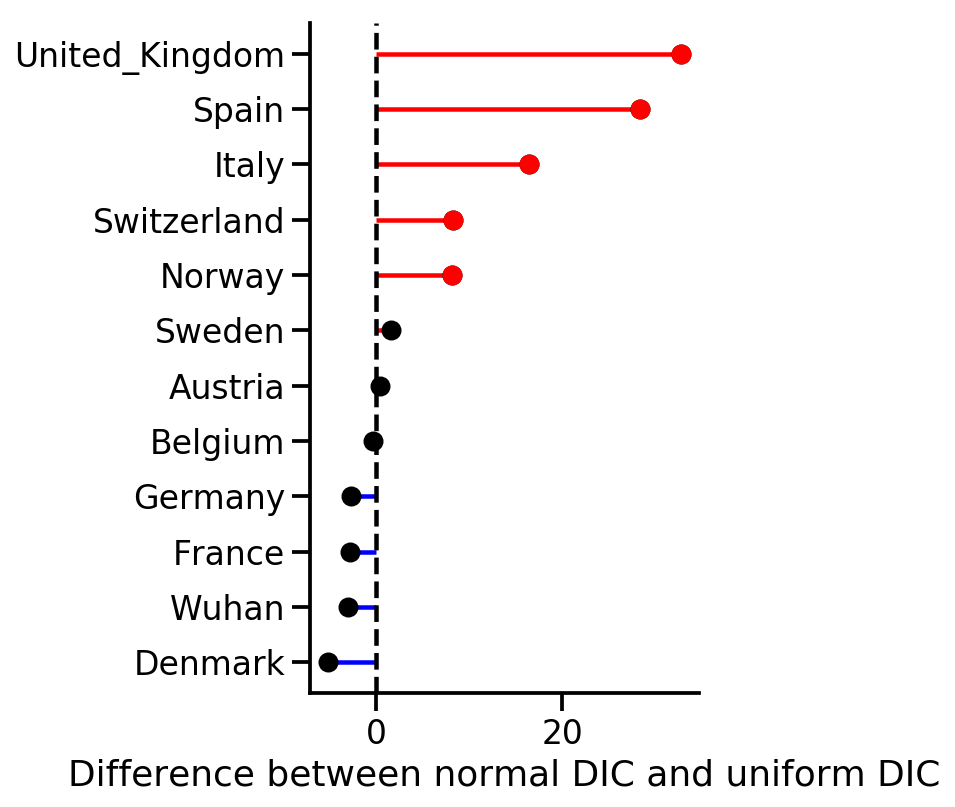

In [36]:
plot_diff(countries, norm[0], uni[0], 'Difference between normal DIC and uniform DIC')

[('Denmark', -1.2), ('Belgium', -0.6), ('France', -0.4), ('Wuhan', -0.3), ('Sweden', -0.2), ('Switzerland', -0.2), ('Austria', -0.1), ('Germany', -0.0), ('Spain', -0.0), ('Italy', -0.0), ('Norway', 0.1), ('United_Kingdom', 0.2)]


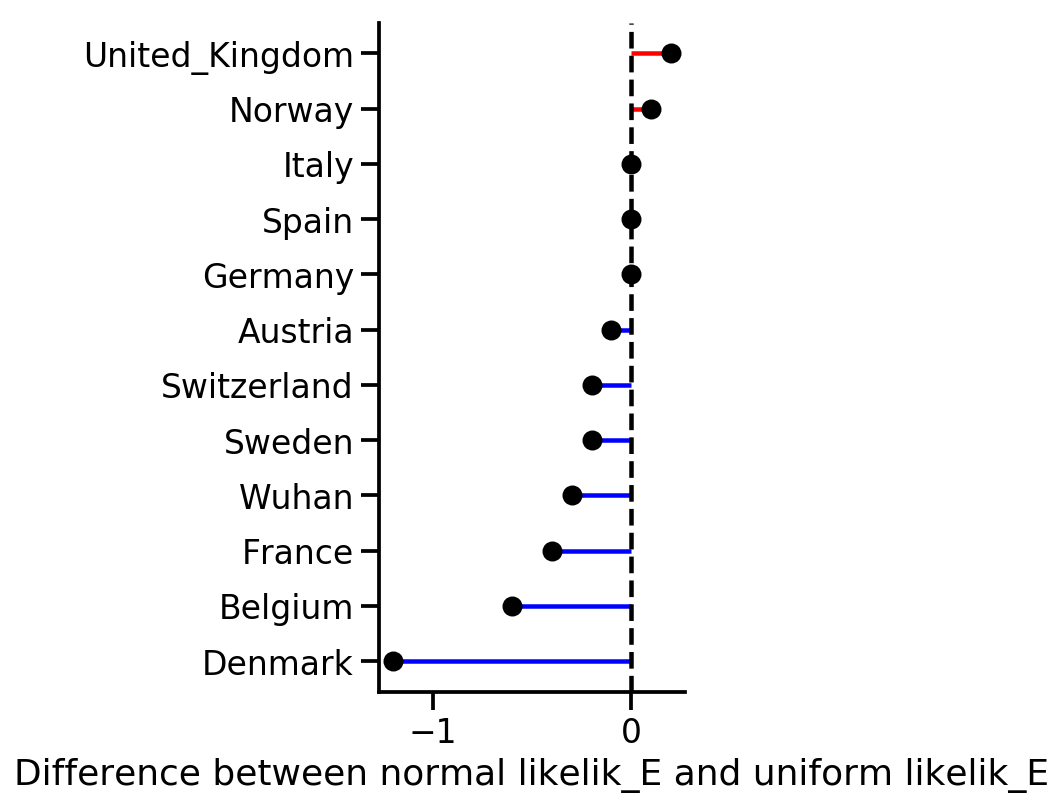

In [37]:
plot_diff(countries, norm[1], uni[1], 'Difference between normal likelik_E and uniform likelik_E')

[('United_Kingdom', -7.7), ('Spain', -6.8), ('Italy', -3.9), ('Switzerland', -1.5), ('Norway', -1.5), ('Wuhan', -0.8), ('Sweden', -0.7), ('Belgium', -0.2), ('Denmark', -0.2), ('Austria', 0.1), ('France', 0.4), ('Germany', 1.4)]


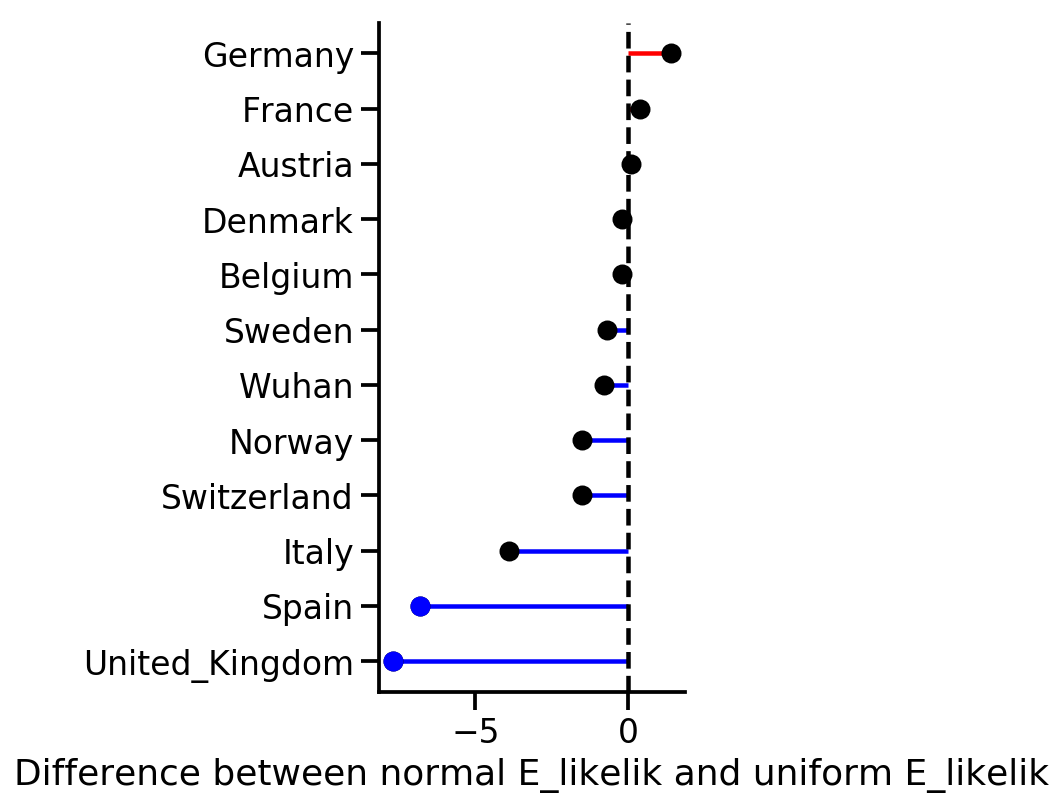

In [38]:
plot_diff(countries, norm[2], uni[2], 'Difference between normal E_likelik and uniform E_likelik')

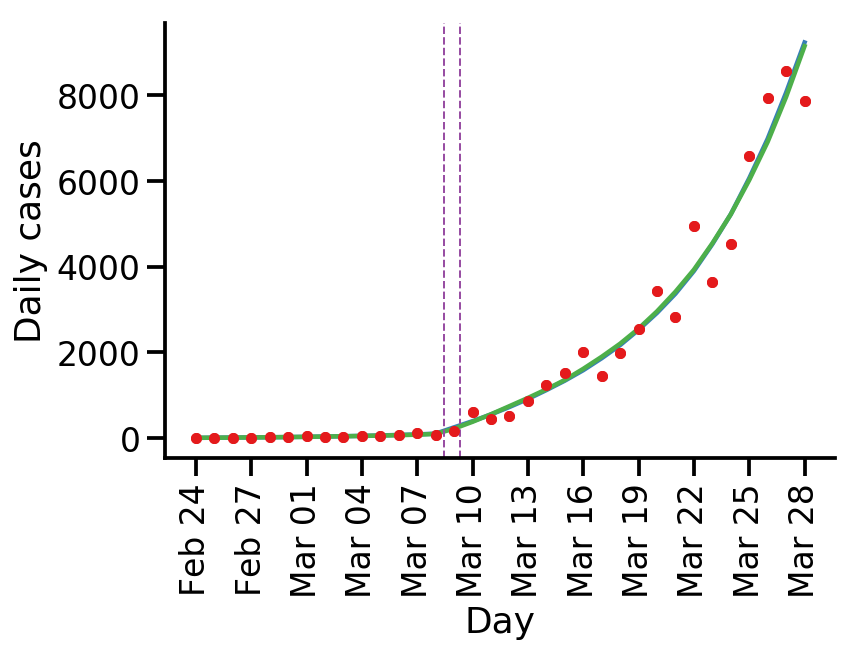

In [39]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Spain'+'.npz','Spain')
ax = plot_incidences()
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
load_data(dir_name+'Spain'+'.npz','Spain')
plot_incidences(ax,color=green)


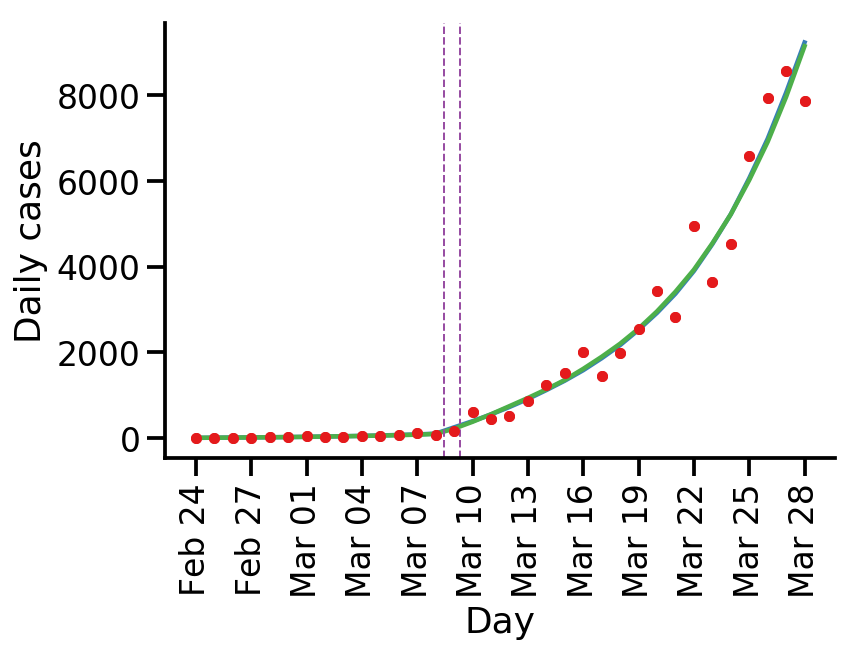

In [41]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Spain'+'.npz','Spain')
ax = plot_incidences()
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
load_data(dir_name+'Spain'+'.npz','Spain')
plot_incidences(ax,color=green)